## IMPORT LIBRARIES

In [1]:
# data wrangling 

import pandas as pd
import numpy as np
import re

# data visualization

import matplotlib.pyplot as plt
import seaborn as sns

# feature engineering

import scipy.stats as ss
import statsmodels.api as sm
from scipy.stats import anderson, mannwhitneyu, chi2_contingency
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score

# models

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KernelDensity, KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# model evaluation

import joblib
from yellowbrick.model_selection import learning_curve, ValidationCurve
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, accuracy_score, f1_score, log_loss, precision_score, recall_score
from sklearn.datasets import make_classification

# filter warning

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=FutureWarning)

## OVERVIEW

In [2]:
# load data

df = pd.read_csv('df_model6.csv')

In [3]:
# check info on initial data

pd.DataFrame({'Features' : df.columns, 'dataType' : df.dtypes.values, 
              'nullvalues' : [df[i].isna().sum() for i in df.columns],
              'unique' : [df[i].nunique() for i in df.columns],
              'uniqueSample' : [list(pd.Series(df[i].unique()).sample()) for i in df.columns]}).reset_index(drop = True)

,Features,dataType,nullvalues,unique,uniqueSample
0,dewpoint_1000_hpa,float64,0,95,[19.0]
1,dewpoint_850_hpa,float64,0,135,[-2.8]
2,k_index,float64,0,303,[8.7]
3,showalter_index,float64,0,645,[6.42]
4,dewpoint_500_hpa,float64,0,215,[10.0]
5,lifted_index,float64,0,644,[3.18]
6,convective_available_potential_energy,float64,0,967,[362.83]
7,cross_totals_index,float64,0,135,[20.3]
8,dewpoint_700_hpa,float64,0,188,[28.8]
9,rain,int64,0,2,[0]


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
dewpoint_1000_hpa,2544.0,20.445165,2.332755,3.40,19.4000,21.00,22.000,26.30
dewpoint_850_hpa,2544.0,12.533726,3.732652,-9.00,11.4000,13.60,14.900,17.80
k_index,2544.0,27.668947,9.859713,-19.70,24.3000,31.10,34.300,41.70
showalter_index,2544.0,2.281116,2.862454,-3.79,0.3400,1.54,3.300,15.52
dewpoint_500_hpa,2544.0,8.188483,14.198746,-9.90,-7.3000,11.50,17.500,46.70
lifted_index,2544.0,-0.083581,2.533075,-29.26,-1.7025,-0.61,1.070,12.48
convective_available_potential_energy,2544.0,233.733518,326.936462,0.00,0.1800,97.27,352.390,3419.86
cross_totals_index,2544.0,17.791038,3.781396,-6.30,16.7000,18.80,20.200,24.50
dewpoint_700_hpa,2544.0,4.256604,5.681522,-9.80,1.6000,4.80,6.525,30.00
rain,2544.0,0.331368,0.470798,0.00,0.0000,0.00,1.000,1.00


## FEATURE ENGINEERING

In [4]:
# Split target features

X = df.drop(['rain'], axis=1)
y = df['rain']

In [5]:
# scale X features using RobustScaler

for i in X :
    scaler = RobustScaler()
    X[i] = scaler.fit_transform(X[i].values.reshape(-1,1))

In [6]:
# Split train, test 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

# Oversampling
X_train_sm, y_train_sm = SMOTE(random_state = False).fit_sample(X_train, y_train)

## MODEL TESTING

In [7]:
# Model Best Parameter

model  = joblib.load('model_RFC6')
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

    Not Rain       0.80      0.71      0.75       322
        Rain       0.58      0.70      0.64       187

    accuracy                           0.71       509
   macro avg       0.69      0.71      0.70       509
weighted avg       0.72      0.71      0.71       509



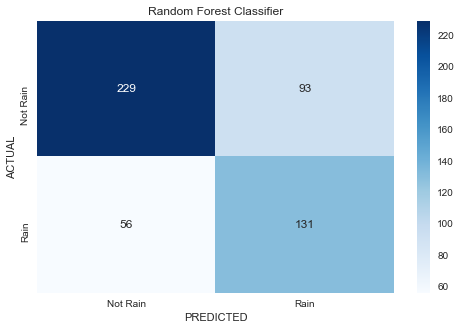

In [8]:
# Model evaluation

labels = ['Not Rain', 'Rain']
print(classification_report(y_test, y_pred, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Random Forest Classifier')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

In [50]:
# split rain and not rain

rain_no  = df[df['rain']==0].head(20).drop(columns = ['rain'], axis = 1).T
rain_yes = df[df['rain']==1].head(20).drop(columns = ['rain'], axis = 1).T

In [51]:
# show not rain data

rain_no

,0,1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,17,19,21,23
dewpoint_1000_hpa,22.20,22.20,23.50,23.50,22.10,22.10,23.10,23.10,20.60,20.60,20.80,20.80,22.00,21.80,21.80,21.80,21.80,21.20,22.50,19.80
dewpoint_850_hpa,15.80,15.80,15.10,15.10,13.00,13.00,15.30,15.30,11.80,11.80,12.00,12.00,13.40,9.60,9.60,12.80,12.80,15.10,11.40,12.60
k_index,35.40,35.40,32.20,32.20,33.70,33.70,18.00,18.00,21.10,21.10,14.70,14.70,32.30,23.30,23.30,29.30,29.30,33.90,28.30,21.70
showalter_index,0.16,0.16,1.33,1.33,2.82,2.82,0.75,0.75,3.59,3.59,5.12,5.12,1.86,5.91,5.91,3.50,3.50,2.04,1.64,1.98
dewpoint_500_hpa,11.30,11.30,26.10,26.10,34.10,34.10,36.30,36.30,36.50,36.50,27.70,27.70,14.50,40.10,40.10,16.70,16.70,29.30,-9.10,13.50
lifted_index,-1.48,-1.48,-2.35,-2.35,-0.87,-0.87,-2.06,-2.06,0.16,0.16,1.50,1.50,-1.25,0.43,0.43,-0.86,-0.86,0.06,-3.62,0.10
convective_available_potential_energy,508.22,508.22,952.96,952.96,276.15,276.15,938.36,938.36,135.81,135.81,156.80,156.80,414.94,144.08,144.08,269.54,269.54,153.22,481.80,0.00
cross_totals_index,20.10,20.10,19.20,19.20,17.10,17.10,19.60,19.60,16.30,16.30,14.70,14.70,17.90,12.70,12.70,16.50,16.50,18.40,17.90,18.10
dewpoint_700_hpa,6.90,6.90,6.00,6.00,6.60,6.60,-9.80,-9.80,-3.60,-3.60,-8.00,-8.00,3.60,-1.00,-1.00,3.40,3.40,6.90,1.40,-3.60


In [52]:
# show rain data

rain_yes

,12,18,20,22,24,28,30,32,34,36,37,39,40,41,46,47,48,49,50,51
dewpoint_1000_hpa,22.00,21.20,22.50,19.80,21.60,21.60,22.00,21.90,23.10,24.50,24.50,22.30,23.10,23.10,22.30,22.30,23.70,23.70,23.10,23.10
dewpoint_850_hpa,13.40,15.10,11.40,12.60,14.50,13.00,9.00,14.70,16.40,16.20,16.20,16.00,17.00,17.00,16.10,16.10,16.20,16.20,15.80,15.80
k_index,32.30,33.90,28.30,21.70,27.40,35.40,28.10,34.10,32.90,32.70,32.70,30.30,35.20,35.20,34.50,34.50,36.60,36.60,34.80,34.80
showalter_index,1.86,2.04,1.64,1.98,0.63,1.93,5.70,1.35,0.19,-0.61,-0.61,-0.32,0.22,0.22,0.69,0.69,-0.72,-0.72,0.63,0.63
dewpoint_500_hpa,14.50,29.30,-9.10,13.50,21.90,-8.60,12.10,18.90,23.50,10.50,10.50,-4.60,-6.50,-6.50,-8.30,-8.30,-5.50,-5.50,-4.40,-4.40
lifted_index,-1.25,0.06,-3.62,0.10,-1.68,-1.82,-1.14,-1.95,-1.17,-4.06,-4.06,-1.21,-0.77,-0.77,-1.83,-1.83,-3.45,-3.45,-1.13,-1.13
convective_available_potential_energy,414.94,153.22,481.80,0.00,271.95,390.93,309.84,923.77,708.35,1705.29,1705.29,189.08,344.24,344.24,1022.98,1022.98,1356.38,1356.38,142.58,142.58
cross_totals_index,17.90,18.40,17.90,18.10,19.40,17.50,13.10,18.60,19.90,20.70,20.70,20.50,20.50,20.50,19.40,19.40,20.90,20.90,20.10,20.10
dewpoint_700_hpa,3.60,6.90,1.40,-3.60,-1.00,7.10,5.00,6.10,4.60,4.00,4.00,2.40,7.10,7.10,6.90,6.90,7.50,7.50,7.10,7.10


In [71]:
# RFC
# predict not rain

for i in rain_no :
    rain_no[i] = rain_no[i].ravel().tolist()
    pred = round(model.predict_proba([rain_no[i]])[:,0][0]*100, 2)
    if pred > 50 :
        print(f'Rain Probability is {pred}% - it will be Rain')
    else :
        print(f'Rain Probability is {pred}% - it will not Rain')

Rain Probability is 40.89% - it will not Rain
Rain Probability is 40.89% - it will not Rain
Rain Probability is 45.7% - it will not Rain
Rain Probability is 45.7% - it will not Rain
Rain Probability is 47.59% - it will not Rain
Rain Probability is 47.59% - it will not Rain
Rain Probability is 45.37% - it will not Rain
Rain Probability is 45.37% - it will not Rain
Rain Probability is 47.43% - it will not Rain
Rain Probability is 47.43% - it will not Rain
Rain Probability is 52.51% - it will be Rain
Rain Probability is 52.51% - it will be Rain
Rain Probability is 46.05% - it will not Rain
Rain Probability is 45.24% - it will not Rain
Rain Probability is 45.24% - it will not Rain
Rain Probability is 48.08% - it will not Rain
Rain Probability is 48.08% - it will not Rain
Rain Probability is 47.36% - it will not Rain
Rain Probability is 45.29% - it will not Rain
Rain Probability is 46.16% - it will not Rain


In [70]:
# RFC
# predict rain

for i in rain_yes :
    rain_yes[i] = rain_yes[i].ravel().tolist()
    pred = round(model.predict_proba([rain_yes[i]])[:,1][0]*100, 2)
    if pred > 50 :
        print(f'Rain Probability is {pred}% - it will be Rain')
    else :
        print(f'Rain Probability is {pred}% - it will not Rain')

Rain Probability is 53.95% - it will be Rain
Rain Probability is 52.64% - it will be Rain
Rain Probability is 54.71% - it will be Rain
Rain Probability is 53.84% - it will be Rain
Rain Probability is 57.01% - it will be Rain
Rain Probability is 54.61% - it will be Rain
Rain Probability is 53.97% - it will be Rain
Rain Probability is 54.28% - it will be Rain
Rain Probability is 59.08% - it will be Rain
Rain Probability is 61.24% - it will be Rain
Rain Probability is 61.24% - it will be Rain
Rain Probability is 56.83% - it will be Rain
Rain Probability is 58.63% - it will be Rain
Rain Probability is 58.63% - it will be Rain
Rain Probability is 55.0% - it will be Rain
Rain Probability is 55.0% - it will be Rain
Rain Probability is 49.25% - it will not Rain
Rain Probability is 49.25% - it will not Rain
Rain Probability is 55.5% - it will be Rain
Rain Probability is 55.5% - it will be Rain
